In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:

traindf = pd.read_csv('C1_Train_Data.csv')

In [4]:
traindf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
testdf =pd.read_csv('C1_Test_Data.csv')

In [6]:
testdf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [7]:
validdf=pd.read_csv('C1_Test_Data.csv')

In [8]:
validdf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [9]:
print(traindf.shape)
print(testdf.shape)
print(validdf.shape)

(614, 13)
(367, 12)
(367, 12)


In [10]:
print(traindf.info())
print(testdf.info())
print(validdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            3

In [11]:
validdf.rename(columns ={'outcome':'Loan_Status'}, inplace=True)

In [12]:
traindf.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
traindf.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
print(traindf.columns)
print(traindf.isnull().sum())
print(testdf.columns)
print(testdf.isnull().sum())
print(validdf.columns)
print(validdf.isnull().sum())

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount

In [15]:
sumsetdf =pd.concat([traindf,testdf,validdf],axis=0,sort=False)

In [16]:
print(sumsetdf.info())
print(sumsetdf.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              1348 non-null object
Gender               1313 non-null object
Married              1345 non-null object
Dependents           1313 non-null object
Education            1348 non-null object
Self_Employed        1270 non-null object
ApplicantIncome      1348 non-null int64
CoapplicantIncome    1348 non-null float64
LoanAmount           1316 non-null float64
Loan_Amount_Term     1322 non-null float64
Credit_History       1240 non-null float64
Property_Area        1348 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 147.4+ KB
None
(1348, 13)


In [17]:
sumsetdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
sumsetdf.reset_index(inplace=True,drop=True)

In [19]:
sumsetdf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1343,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
1344,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
1345,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
1346,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
1347,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [20]:
sumsetdf.isnull().sum()

Loan_ID                0
Gender                35
Married                3
Dependents            35
Education              0
Self_Employed         78
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            32
Loan_Amount_Term      26
Credit_History       108
Property_Area          0
Loan_Status          734
dtype: int64

In [21]:
print(sumsetdf['Credit_History'].value_counts(dropna=False))
print(sumsetdf['Dependents'].value_counts(dropna=False))
print(sumsetdf['Gender'].value_counts(dropna=False))
print(sumsetdf['LoanAmount'].value_counts(dropna=False))
print(sumsetdf['Loan_Amount_Term'].value_counts(dropna=False))
print(sumsetdf['Married'].value_counts(dropna=False))
print(sumsetdf['Self_Employed'].value_counts(dropna=False))

1.0    1033
0.0     207
NaN     108
Name: Credit_History, dtype: int64
0      745
2      219
1      218
3+     131
NaN     35
Name: Dependents, dtype: int64
Male      1061
Female     252
NaN         35
Name: Gender, dtype: int64
120.0    38
110.0    37
100.0    33
NaN      32
150.0    31
         ..
405.0     1
265.0     1
42.0      1
279.0     1
73.0      1
Name: LoanAmount, Length: 233, dtype: int64
360.0    1134
180.0      88
480.0      31
300.0      27
NaN        26
240.0      12
84.0       10
120.0       5
36.0        4
60.0        4
12.0        3
350.0       2
6.0         2
Name: Loan_Amount_Term, dtype: int64
Yes    864
No     481
NaN      3
Name: Married, dtype: int64
No     1114
Yes     156
NaN      78
Name: Self_Employed, dtype: int64


In [22]:
sumsetdf['Credit_History'].value_counts(dropna=False)

1.0    1033
0.0     207
NaN     108
Name: Credit_History, dtype: int64

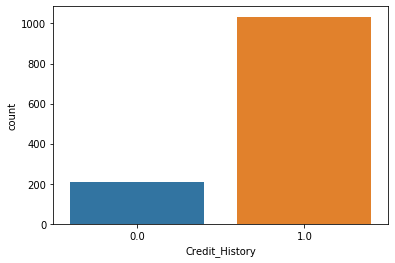

In [23]:
sns.countplot(x="Credit_History", data=sumsetdf)
plt.show()

In [24]:
sumsetdf[sumsetdf['Credit_History'].isnull()].index.tolist()

[16,
 24,
 30,
 42,
 79,
 83,
 86,
 95,
 117,
 125,
 129,
 130,
 156,
 181,
 187,
 198,
 219,
 236,
 237,
 259,
 260,
 279,
 309,
 313,
 317,
 318,
 323,
 348,
 363,
 377,
 392,
 395,
 411,
 444,
 449,
 451,
 460,
 473,
 490,
 491,
 497,
 503,
 506,
 530,
 533,
 544,
 556,
 565,
 583,
 600,
 617,
 626,
 640,
 642,
 659,
 704,
 713,
 718,
 729,
 753,
 757,
 778,
 791,
 793,
 799,
 816,
 834,
 873,
 876,
 879,
 896,
 900,
 919,
 943,
 950,
 965,
 972,
 974,
 978,
 984,
 993,
 1007,
 1009,
 1026,
 1071,
 1080,
 1085,
 1096,
 1120,
 1124,
 1145,
 1158,
 1160,
 1166,
 1183,
 1201,
 1240,
 1243,
 1246,
 1263,
 1267,
 1286,
 1310,
 1317,
 1332,
 1339,
 1341,
 1345]

In [25]:
Credit_History_Null=sumsetdf[sumsetdf["Credit_History"].isnull()].index.tolist()
print(Credit_History_Null)

[16, 24, 30, 42, 79, 83, 86, 95, 117, 125, 129, 130, 156, 181, 187, 198, 219, 236, 237, 259, 260, 279, 309, 313, 317, 318, 323, 348, 363, 377, 392, 395, 411, 444, 449, 451, 460, 473, 490, 491, 497, 503, 506, 530, 533, 544, 556, 565, 583, 600, 617, 626, 640, 642, 659, 704, 713, 718, 729, 753, 757, 778, 791, 793, 799, 816, 834, 873, 876, 879, 896, 900, 919, 943, 950, 965, 972, 974, 978, 984, 993, 1007, 1009, 1026, 1071, 1080, 1085, 1096, 1120, 1124, 1145, 1158, 1160, 1166, 1183, 1201, 1240, 1243, 1246, 1263, 1267, 1286, 1310, 1317, 1332, 1339, 1341, 1345]


In [26]:
sumsetdf['Credit_History'].iloc[Credit_History_Null]=1

/home/deva/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
Credit_History_Null=sumsetdf[sumsetdf["Credit_History"].isnull()].index.tolist()
print(Credit_History_Null)

[]


In [28]:
print(sumsetdf['Dependents'].value_counts(dropna=False))

0      745
2      219
1      218
3+     131
NaN     35
Name: Dependents, dtype: int64


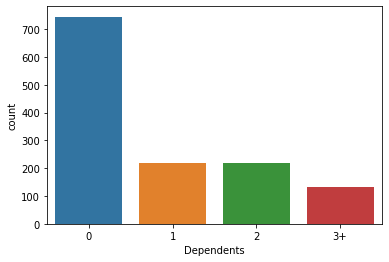

In [29]:
sns.countplot(x='Dependents',data=sumsetdf)
plt.show()

In [30]:
sumsetdf[sumsetdf['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [31]:
Dependents_Null=sumsetdf[sumsetdf["Dependents"].isnull()].index.tolist()
print(Dependents_Null)

[102, 104, 120, 226, 228, 293, 301, 332, 335, 346, 355, 435, 517, 571, 597, 660, 684, 725, 752, 816, 861, 865, 879, 916, 926, 1027, 1051, 1092, 1119, 1183, 1228, 1232, 1246, 1283, 1293]


In [32]:
sumsetdf['Dependents'].iloc[Dependents_Null]='0'

In [33]:
Dependents_Null=sumsetdf[sumsetdf["Dependents"].isnull()].index.tolist()
print(Dependents_Null)
print(sumsetdf['Dependents'].value_counts(dropna=False))

[]
0     780
2     219
1     218
3+    131
Name: Dependents, dtype: int64


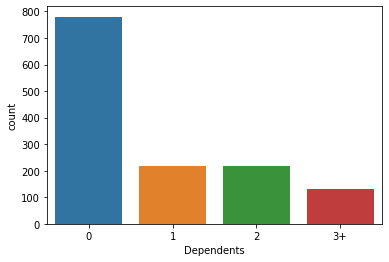

In [34]:
sns.countplot(x="Dependents",data=sumsetdf)
plt.show()

In [35]:
#print(sumsetdf['Gender'].value_counts(dropna=False))

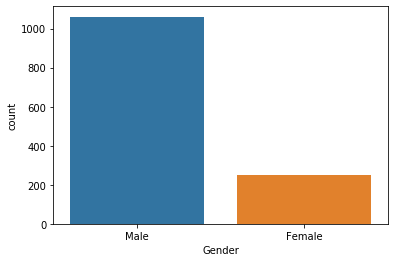

In [36]:
sns.countplot(x='Gender',data=sumsetdf)
plt.show()

In [37]:
sumsetdf[sumsetdf['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,1.0,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [38]:
Gender_Null=sumsetdf[sumsetdf["Gender"].isnull()].index.tolist()
print(Gender_Null)

[23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592, 636, 665, 720, 752, 823, 845, 859, 893, 910, 917, 932, 1003, 1032, 1087, 1119, 1190, 1212, 1226, 1260, 1277, 1284, 1299]


In [39]:
sumsetdf['Gender'].iloc[Gender_Null]= 'Male'

In [40]:
Gender_Null=sumsetdf[sumsetdf["Gender"].isnull()].index.tolist()
print(Gender_Null)
print(sumsetdf['Gender'].value_counts(dropna=False))

[]
Male      1096
Female     252
Name: Gender, dtype: int64


In [41]:
sumsetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 13 columns):
Loan_ID              1348 non-null object
Gender               1348 non-null object
Married              1345 non-null object
Dependents           1348 non-null object
Education            1348 non-null object
Self_Employed        1270 non-null object
ApplicantIncome      1348 non-null int64
CoapplicantIncome    1348 non-null float64
LoanAmount           1316 non-null float64
Loan_Amount_Term     1322 non-null float64
Credit_History       1348 non-null float64
Property_Area        1348 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 137.0+ KB


In [42]:
sumsetdf['Education'].value_counts()

Graduate        1046
Not Graduate     302
Name: Education, dtype: int64

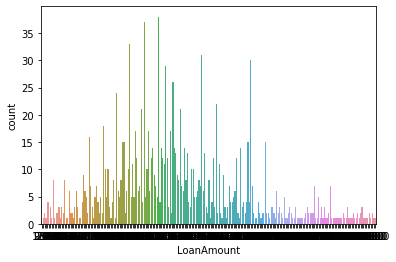

In [43]:
#print(sumsetdf['LoanAmount'].value_counts(dropna=False))
sns.countplot(x='LoanAmount',data=sumsetdf)
plt.show()

In [44]:
sumsetdf[sumsetdf['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,1.0,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [45]:
LoanAmount_Null = sumsetdf[sumsetdf['LoanAmount'].isnull()].index.tolist()
sumsetdf['LoanAmount'].iloc[LoanAmount_Null] = sumsetdf['LoanAmount'].median()
LoanAmount_Null = sumsetdf[sumsetdf['LoanAmount'].isnull()].index.tolist()
print(LoanAmount_Null)
print(sumsetdf['LoanAmount'].value_counts(dropna=False))

[]
126.0    44
120.0    38
110.0    37
100.0    33
150.0    31
         ..
490.0     1
304.0     1
207.0     1
54.0      1
191.0     1
Name: LoanAmount, Length: 232, dtype: int64


In [46]:
print(sumsetdf['Loan_Amount_Term'].value_counts(dropna=False))

360.0    1134
180.0      88
480.0      31
300.0      27
NaN        26
240.0      12
84.0       10
120.0       5
36.0        4
60.0        4
12.0        3
350.0       2
6.0         2
Name: Loan_Amount_Term, dtype: int64


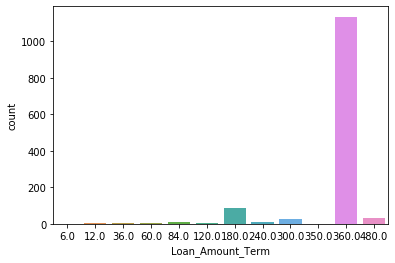

In [47]:
sns.countplot(x="Loan_Amount_Term",data=sumsetdf)
plt.show()

In [48]:
Loan_Amount_Term_Null = sumsetdf[sumsetdf['Loan_Amount_Term'].isnull()].index.tolist()
sumsetdf['Loan_Amount_Term'].iloc[Loan_Amount_Term_Null] = 360.0
Loan_Amount_Term_Null = sumsetdf[sumsetdf['Loan_Amount_Term'].isnull()].index.tolist()
print(Loan_Amount_Term_Null)
print(sumsetdf['Loan_Amount_Term'].value_counts(dropna=False))

[]
360.0    1160
180.0      88
480.0      31
300.0      27
240.0      12
84.0       10
120.0       5
36.0        4
60.0        4
12.0        3
350.0       2
6.0         2
Name: Loan_Amount_Term, dtype: int64


In [49]:
print(sumsetdf['Married'].value_counts(dropna=False))

Yes    864
No     481
NaN      3
Name: Married, dtype: int64


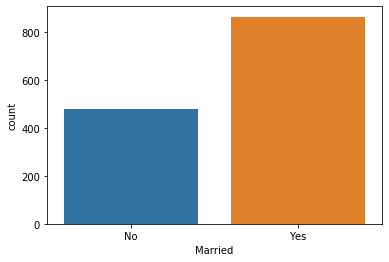

In [50]:
sns.countplot(x='Married',data=sumsetdf)
plt.show()

In [51]:
Married_Null = sumsetdf[sumsetdf['Married'].isnull()].index.tolist()
sumsetdf['Married'].iloc[Married_Null] = 'Yes'
Married_Null = sumsetdf[sumsetdf['Married'].isnull()].index.tolist()
print(Married_Null)
print(sumsetdf['Married'].value_counts(dropna=False))

[]
Yes    867
No     481
Name: Married, dtype: int64


In [52]:
print(sumsetdf['Self_Employed'].value_counts(dropna=False))

No     1114
Yes     156
NaN      78
Name: Self_Employed, dtype: int64


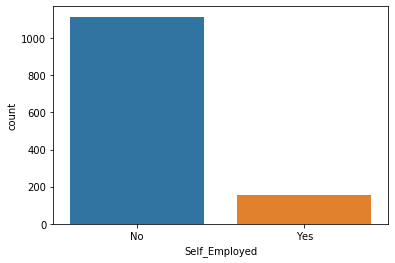

In [53]:
sns.countplot(x='Self_Employed',data=sumsetdf)
plt.show()

In [54]:
Self_employed_null = sumsetdf[sumsetdf['Self_Employed'].isnull()].index.tolist()
sumsetdf['Self_Employed'].iloc[Self_employed_null] = 'No'
print(sumsetdf['Self_Employed'].value_counts(dropna=False))

No     1192
Yes     156
Name: Self_Employed, dtype: int64


In [55]:
sumsetdf.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          734
dtype: int64

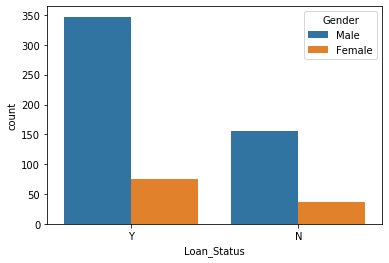

In [56]:
sns.countplot(x='Loan_Status',hue='Gender',data=sumsetdf)

In [57]:
traindf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


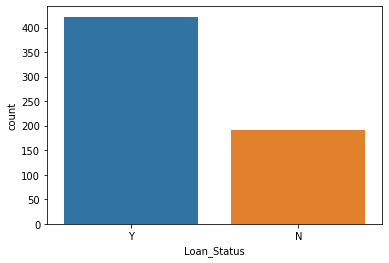

In [58]:
sns.countplot(x='Loan_Status', data=traindf)

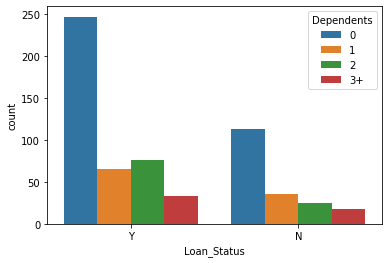

In [59]:
sns.countplot(x='Loan_Status',hue='Dependents',data=sumsetdf)

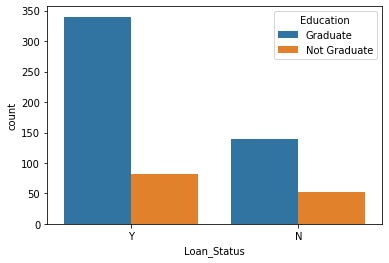

In [60]:
sns.countplot(x='Loan_Status',hue='Education',data=sumsetdf)

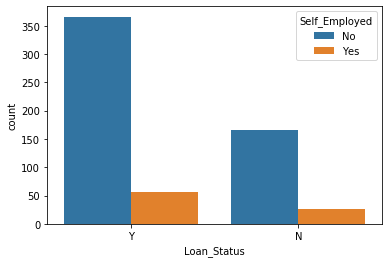

In [61]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data=sumsetdf)

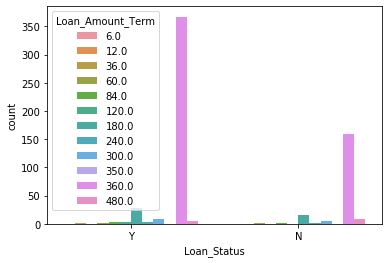

In [62]:
sns.countplot(x='Loan_Status',hue='Loan_Amount_Term',data=sumsetdf)

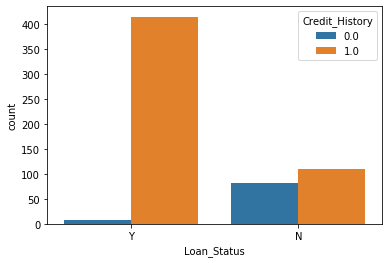

In [63]:
sns.countplot(x='Loan_Status',hue='Credit_History',data=sumsetdf)

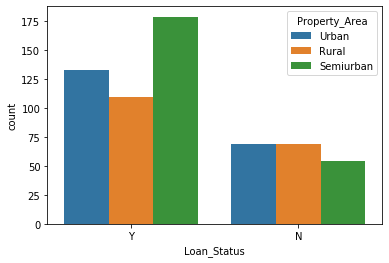

In [64]:
sns.countplot(x='Loan_Status',hue='Property_Area',data=sumsetdf)

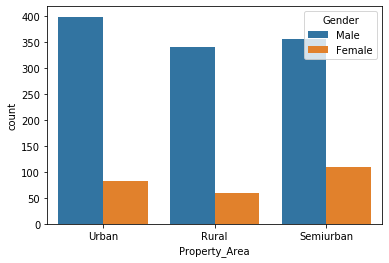

In [65]:
sns.countplot(x='Property_Area',hue='Gender',data=sumsetdf)

In [66]:
sumsetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 13 columns):
Loan_ID              1348 non-null object
Gender               1348 non-null object
Married              1348 non-null object
Dependents           1348 non-null object
Education            1348 non-null object
Self_Employed        1348 non-null object
ApplicantIncome      1348 non-null int64
CoapplicantIncome    1348 non-null float64
LoanAmount           1348 non-null float64
Loan_Amount_Term     1348 non-null float64
Credit_History       1348 non-null float64
Property_Area        1348 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 137.0+ KB


In [67]:
sdf=sumsetdf.drop(['Loan_ID'],axis=1)

In [68]:
sdf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1343,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
1344,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
1345,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN
1346,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [69]:
sumsetdfdum=pd.get_dummies(sdf,drop_first=True)

In [70]:
sumsetdfdum

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,4009,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,0
1344,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0
1345,3250,1993.0,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,0
1346,5000,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0,0


In [71]:
sumsetdfdum.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [72]:
sumsetdfdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 15 columns):
ApplicantIncome            1348 non-null int64
CoapplicantIncome          1348 non-null float64
LoanAmount                 1348 non-null float64
Loan_Amount_Term           1348 non-null float64
Credit_History             1348 non-null float64
Gender_Male                1348 non-null uint8
Married_Yes                1348 non-null uint8
Dependents_1               1348 non-null uint8
Dependents_2               1348 non-null uint8
Dependents_3+              1348 non-null uint8
Education_Not Graduate     1348 non-null uint8
Self_Employed_Yes          1348 non-null uint8
Property_Area_Semiurban    1348 non-null uint8
Property_Area_Urban        1348 non-null uint8
Loan_Status_Y              1348 non-null uint8
dtypes: float64(4), int64(1), uint8(10)
memory usage: 65.9 KB


In [73]:
traindata=sumsetdfdum[0:614]
testdata=sumsetdfdum[614:981]
validdata=sumsetdfdum[981:]

In [74]:
traindata.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
613,4583,0.0,133.0,360.0,0.0,0,0,0,0,0,0,1,1,0,0


In [75]:
testdata.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
976,4009,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,0
977,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0
978,3250,1993.0,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,0
979,5000,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0,0
980,9200,0.0,98.0,180.0,1.0,1,0,0,0,0,0,1,0,0,0


In [76]:
validdata.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1343,4009,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,0
1344,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0
1345,3250,1993.0,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,0
1346,5000,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0,0
1347,9200,0.0,98.0,180.0,1.0,1,0,0,0,0,0,1,0,0,0


In [77]:
XTrain=traindata.drop(['Loan_Status_Y'],axis=1)
yTrain=traindata['Loan_Status_Y']

XTest=validdata.drop(['Loan_Status_Y'],axis=1)
yTest=validdata['Loan_Status_Y']

In [78]:
from sklearn.linear_model import LogisticRegression as LR1

In [79]:
log_reg=LR1()

In [80]:
log_reg.fit(XTrain,yTrain)

/home/deva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_predict = log_reg.predict(XTest)

In [82]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [83]:
yTest

981     0
982     0
983     0
984     0
985     0
       ..
1343    0
1344    0
1345    0
1346    0
1347    0
Name: Loan_Status_Y, Length: 367, dtype: uint8

In [84]:
print(type(yTest))

<class 'pandas.core.series.Series'>


In [85]:
if len(yTest) == len(y_predict) : print("Length Compatible")

Length Compatible


In [86]:
l1 = list(yTest)
l2 = list(y_predict)

In [87]:
count = 0
for m in range(len(l1)):
    if l1[m] == l2[m]:
        count += 1
        
print("Matches : ",count)
print('Accuracy : ',count*100/len(l1))

Matches :  57
Accuracy :  15.53133514986376


In [88]:
count = 0
for x,z in zip(l1,l2):
    if x == z:
        count += 1
        
print("Matches : ",count)
print('Accuracy : ',count*100/len(l1))

Matches :  57
Accuracy :  15.53133514986376


In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(confusion_matrix(yTest,y_predict))

[[ 57 310]
 [  0   0]]


In [91]:
print(classification_report(yTest,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.16      0.27       367
           1       0.00      0.00      0.00         0

    accuracy                           0.16       367
   macro avg       0.50      0.08      0.13       367
weighted avg       1.00      0.16      0.27       367



/home/deva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
